In [171]:
# First, let’s import the libraries we’ll be utilizing for this project.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [173]:
file_path = r'C:\Users\bhara\anime-dataset-2023.csv' 
df = pd.read_csv(r'C:\Users\bhara\anime-dataset-2023.csv')
df = df.iloc[:1000]
df.to_csv('modified_file.csv', index=False)
df


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1095,Kidou Keisatsu Patlabor the Movie,Patlabor: The Movie,機動警察パトレイバー the Movie,7.55,Drama,The Babylon Project is a massive renovation of...,Movie,1.0,"Jul 15, 1989",...,"Production I.G, Studio Deen",Original,1 hr 39 min,PG-13 - Teens 13 or older,1556.0,3095,239,19001.0,44539,https://cdn.myanimelist.net/images/anime/5/747...
996,1096,Kidou Keisatsu Patlabor 2 the Movie,Mobile Police Patlabor 2: The Movie,機動警察パトレイバー2 the Movie,7.96,"Award Winning, Drama, Mystery, Sci-Fi",Three years after the Babylon Project conspira...,Movie,1.0,"Aug 7, 1993",...,Production I.G,Original,1 hr 53 min,PG-13 - Teens 13 or older,628.0,3521,729,15482.0,35180,https://cdn.myanimelist.net/images/anime/6/747...
997,1097,Lime-iro Senkitan,UNKNOWN,らいむいろ戦奇譚,5.95,"Drama, Supernatural, Ecchi",Around the the 37th year of the Meiji Era (190...,TV,13.0,"Jan 4, 2003 to Mar 29, 2003",...,Studio Hibari,Visual novel,26 min per ep,R+ - Mild Nudity,9045.0,5900,14,3327.0,10603,https://cdn.myanimelist.net/images/anime/6/755...
998,1098,Samurai Girl Real Bout High School,Samurai Girl Real Bout High School,SAMURAI GIRL リアルバウトハイスクール,5.91,"Adventure, Comedy, Fantasy","At Daimon High School, kids settle their dispu...",TV,13.0,"Jul 30, 2001 to Oct 22, 2001",...,Gonzo,Light novel,23 min per ep,PG-13 - Teens 13 or older,9252.0,6017,12,4107.0,10113,https://cdn.myanimelist.net/images/anime/8/154...


In [174]:
# Data types for coloums
print(df.dtypes)


anime_id         int64
Name            object
English name    object
Other name      object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Licensors       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object


In [175]:
# Changing Data Types
columns_to_convert = ['Score', 'Episodes', 'Rank', 'Scored By',]
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)
df[columns_to_convert] = df[columns_to_convert].astype('int64')

In [176]:

#Removing Unkown Values from Table

columns_to_update = ['Score', 'Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']

df[columns_to_update] = df[columns_to_update].replace({'unknown': 0, np.nan: 0})
df

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189,602,1448,206248,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1095,Kidou Keisatsu Patlabor the Movie,Patlabor: The Movie,機動警察パトレイバー the Movie,7,Drama,The Babylon Project is a massive renovation of...,Movie,1,"Jul 15, 1989",...,"Production I.G, Studio Deen",Original,1 hr 39 min,PG-13 - Teens 13 or older,1556,3095,239,19001,44539,https://cdn.myanimelist.net/images/anime/5/747...
996,1096,Kidou Keisatsu Patlabor 2 the Movie,Mobile Police Patlabor 2: The Movie,機動警察パトレイバー2 the Movie,7,"Award Winning, Drama, Mystery, Sci-Fi",Three years after the Babylon Project conspira...,Movie,1,"Aug 7, 1993",...,Production I.G,Original,1 hr 53 min,PG-13 - Teens 13 or older,628,3521,729,15482,35180,https://cdn.myanimelist.net/images/anime/6/747...
997,1097,Lime-iro Senkitan,UNKNOWN,らいむいろ戦奇譚,5,"Drama, Supernatural, Ecchi",Around the the 37th year of the Meiji Era (190...,TV,13,"Jan 4, 2003 to Mar 29, 2003",...,Studio Hibari,Visual novel,26 min per ep,R+ - Mild Nudity,9045,5900,14,3327,10603,https://cdn.myanimelist.net/images/anime/6/755...
998,1098,Samurai Girl Real Bout High School,Samurai Girl Real Bout High School,SAMURAI GIRL リアルバウトハイスクール,5,"Adventure, Comedy, Fantasy","At Daimon High School, kids settle their dispu...",TV,13,"Jul 30, 2001 to Oct 22, 2001",...,Gonzo,Light novel,23 min per ep,PG-13 - Teens 13 or older,9252,6017,12,4107,10113,https://cdn.myanimelist.net/images/anime/8/154...


In [177]:
#We need to check for any missing data. Let's iterate through the dataset to identify if there are any gaps in the information.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

anime_id - 0%
Name - 0%
English name - 0%
Other name - 0%
Score - 0%
Genres - 0%
Synopsis - 0%
Type - 0%
Episodes - 0%
Aired - 0%
Premiered - 0%
Status - 0%
Producers - 0%
Licensors - 0%
Studios - 0%
Source - 0%
Duration - 0%
Rating - 0%
Rank - 0%
Popularity - 0%
Favorites - 0%
Scored By - 0%
Members - 0%
Image URL - 0%


In [178]:
#DataFrame will now only contain rows with 'Rank' values greater than 0, sorted in ascending order.

df = df[df['Rank'] != 0].sort_values(by=['Rank'], ascending=False)

In [235]:
#Displaying Max Rows
#pd.set_option(display.max_rows,100)

In [186]:
df.drop_duplicates()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
387,413,Hametsu no Mars,Mars of Destruction,破滅のマルス,2,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,1,"Jul 6, 2005",...,WAO World,Visual novel,19 min,R - 17+ (violence & profanity),12698,2512,295,47630,65622,https://cdn.myanimelist.net/images/anime/7/688...
716,788,Eiken: Eikenbu yori Ai wo Komete,Eiken,エイケン エイケンヴより愛をこめて,4,"Comedy, Ecchi",Zashono Academy is a massive educational insti...,OVA,2,"Jun 25, 2003 to Jun 23, 2004",...,J.C.Staff,Manga,30 min per ep,R+ - Mild Nudity,12548,3774,47,15777,30553,https://cdn.myanimelist.net/images/anime/1693/...
650,705,Chou Henshin Cosprayers vs. Ankoku Uchuu Shoug...,UNKNOWN,劇場版「超変身コス∞プレイヤー VS暗黒宇宙将軍」,4,"Adventure, Comedy, Sci-Fi","A short 10 minute film by the non-existent ""Ho...",Movie,1,"Aug 21, 2004",...,"Imagin, Studio Live",Original,10 min,PG-13 - Teens 13 or older,12370,9979,2,1120,2501,https://cdn.myanimelist.net/images/anime/9/449...
899,994,Sin in the Rain,UNKNOWN,sin in the rain,4,Mystery,"It is raining in Tokyo at night. A woman, nam...",OVA,1,"Mar 24, 2006",...,Mook Animation,Unknown,22 min,PG-13 - Teens 13 or older,12313,9278,2,1379,3206,https://cdn.myanimelist.net/images/anime/13/53...
914,1009,Battle Spirits: Ryuuko no Ken,Art of Fighting,バトルスピリッツ 龍虎の拳,4,"Action, Comedy","While trying to rescue a cat, martial artist R...",Special,1,"Dec 23, 1993",...,UNKNOWN,Game,48 min,PG-13 - Teens 13 or older,12217,8931,6,1801,3597,https://cdn.myanimelist.net/images/anime/4/640...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,263,Hajime no Ippo,Fighting Spirit,はじめの一歩 THE FIGHTING!,8,Sports,"In his father's absence, teenager Ippo Makunou...",TV,75,"Oct 4, 2000 to Mar 27, 2002",...,Madhouse,Manga,23 min per ep,PG-13 - Teens 13 or older,40,369,20143,267388,546859,https://cdn.myanimelist.net/images/anime/4/863...
176,199,Sen to Chihiro no Kamikakushi,Spirited Away,千と千尋の神隠し,8,"Adventure, Award Winning, Supernatural","Stubborn, spoiled, and naïve, 10-year-old Chih...",Movie,1,"Jul 20, 2001",...,Studio Ghibli,Original,2 hr 4 min,PG - Children,36,44,31139,1234780,1760676,https://cdn.myanimelist.net/images/anime/6/795...
9,19,Monster,Monster,モンスター,8,"Drama, Mystery, Suspense","Dr. Kenzou Tenma, an elite neurosurgeon recent...",TV,74,"Apr 7, 2004 to Sep 28, 2005",...,Madhouse,Manga,24 min per ep,R+ - Mild Nudity,26,142,47235,368569,1013100,https://cdn.myanimelist.net/images/anime/10/18...
833,918,Gintama,Gintama,銀魂,8,"Action, Comedy, Sci-Fi",Edo is a city that was home to the vigor and a...,TV,201,"Apr 4, 2006 to Mar 25, 2010",...,Sunrise,Manga,24 min per ep,PG-13 - Teens 13 or older,16,138,57678,381428,1023068,https://cdn.myanimelist.net/images/anime/10/73...


In [187]:
# Pearson, Kendall, and Spearman are different methods for measuring correlation between two variables.
#Each has its own characteristics and is used in different contexts

In [189]:
# Printing correlation matrix with different meathod's(kendall,pearson,spearman)
int_columns = df.select_dtypes(include=['int64'])
correlation_matrix = int_columns.corr(method='kendall')
print(correlation_matrix)

            anime_id     Score  Episodes      Rank  Popularity  Favorites  \
anime_id    1.000000 -0.170533 -0.183652  0.160077    0.227736  -0.244467   
Score      -0.170533  1.000000  0.186104 -0.794453   -0.507722   0.584365   
Episodes   -0.183652  0.186104  1.000000 -0.184273   -0.101856   0.253625   
Rank        0.160077 -0.794453 -0.184273  1.000000    0.497981  -0.590954   
Popularity  0.227736 -0.507722 -0.101856  0.497981    1.000000  -0.743372   
Favorites  -0.244467  0.584365  0.253625 -0.590954   -0.743372   1.000000   
Scored By  -0.222376  0.492589  0.056125 -0.484261   -0.918703   0.696166   
Members    -0.227702  0.507698  0.101864 -0.497987   -0.999911   0.743367   

            Scored By   Members  
anime_id    -0.222376 -0.227702  
Score        0.492589  0.507698  
Episodes     0.056125  0.101864  
Rank        -0.484261 -0.497987  
Popularity  -0.918703 -0.999911  
Favorites    0.696166  0.743367  
Scored By    1.000000  0.918675  
Members      0.918675  1.000000  


In [190]:
int_columns = df.select_dtypes(include=['int64'])
correlation_matrix = int_columns.corr(method='pearson' )
print(correlation_matrix)

            anime_id     Score  Episodes      Rank  Popularity  Favorites  \
anime_id    1.000000 -0.223974 -0.132723  0.234242    0.324632  -0.154017   
Score      -0.223974  1.000000  0.217605 -0.911195   -0.610941   0.282005   
Episodes   -0.132723  0.217605  1.000000 -0.262300   -0.190786   0.247898   
Rank        0.234242 -0.911195 -0.262300  1.000000    0.673270  -0.242029   
Popularity  0.324632 -0.610941 -0.190786  0.673270    1.000000  -0.279716   
Favorites  -0.154017  0.282005  0.247898 -0.242029   -0.279716   1.000000   
Scored By  -0.212381  0.368593  0.310999 -0.343483   -0.457828   0.788387   
Members    -0.230929  0.411427  0.319918 -0.383950   -0.504644   0.819430   

            Scored By   Members  
anime_id    -0.212381 -0.230929  
Score        0.368593  0.411427  
Episodes     0.310999  0.319918  
Rank        -0.343483 -0.383950  
Popularity  -0.457828 -0.504644  
Favorites    0.788387  0.819430  
Scored By    1.000000  0.984292  
Members      0.984292  1.000000  


In [191]:
int_columns = df.select_dtypes(include=['int64'])
correlation_matrix = int_columns.corr(method='spearman' )
print(correlation_matrix)

            anime_id     Score  Episodes      Rank  Popularity  Favorites  \
anime_id    1.000000 -0.218328 -0.258279  0.236589    0.336115  -0.359631   
Score      -0.218328  1.000000  0.222932 -0.918876   -0.624590   0.708746   
Episodes   -0.258279  0.222932  1.000000 -0.250201   -0.141002   0.351704   
Rank        0.236589 -0.918876 -0.250201  1.000000    0.684571  -0.782447   
Popularity  0.336115 -0.624590 -0.141002  0.684571    1.000000  -0.905884   
Favorites  -0.359631  0.708746  0.351704 -0.782447   -0.905884   1.000000   
Scored By  -0.328952  0.607478  0.077452 -0.668489   -0.990704   0.872901   
Members    -0.336099  0.624578  0.141020 -0.684569   -1.000000   0.905887   

            Scored By   Members  
anime_id    -0.328952 -0.336099  
Score        0.607478  0.624578  
Episodes     0.077452  0.141020  
Rank        -0.668489 -0.684569  
Popularity  -0.990704 -1.000000  
Favorites    0.872901  0.905887  
Scored By    1.000000  0.990698  
Members      0.990698  1.000000  


In [194]:
threshold = 0.5 
strong_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
print('Strong Correlations (greater than 0.5 or less than -0.5):')
print(strong_correlations)

Strong Correlations (greater than 0.5 or less than -0.5):
            anime_id     Score  Episodes      Rank  Popularity  Favorites  \
anime_id         1.0       NaN       NaN       NaN         NaN        NaN   
Score            NaN  1.000000       NaN -0.918876   -0.624590   0.708746   
Episodes         NaN       NaN       1.0       NaN         NaN        NaN   
Rank             NaN -0.918876       NaN  1.000000    0.684571  -0.782447   
Popularity       NaN -0.624590       NaN  0.684571    1.000000  -0.905884   
Favorites        NaN  0.708746       NaN -0.782447   -0.905884   1.000000   
Scored By        NaN  0.607478       NaN -0.668489   -0.990704   0.872901   
Members          NaN  0.624578       NaN -0.684569   -1.000000   0.905887   

            Scored By   Members  
anime_id          NaN       NaN  
Score        0.607478  0.624578  
Episodes          NaN       NaN  
Rank        -0.668489 -0.684569  
Popularity  -0.990704 -1.000000  
Favorites    0.872901  0.905887  
Scored By 

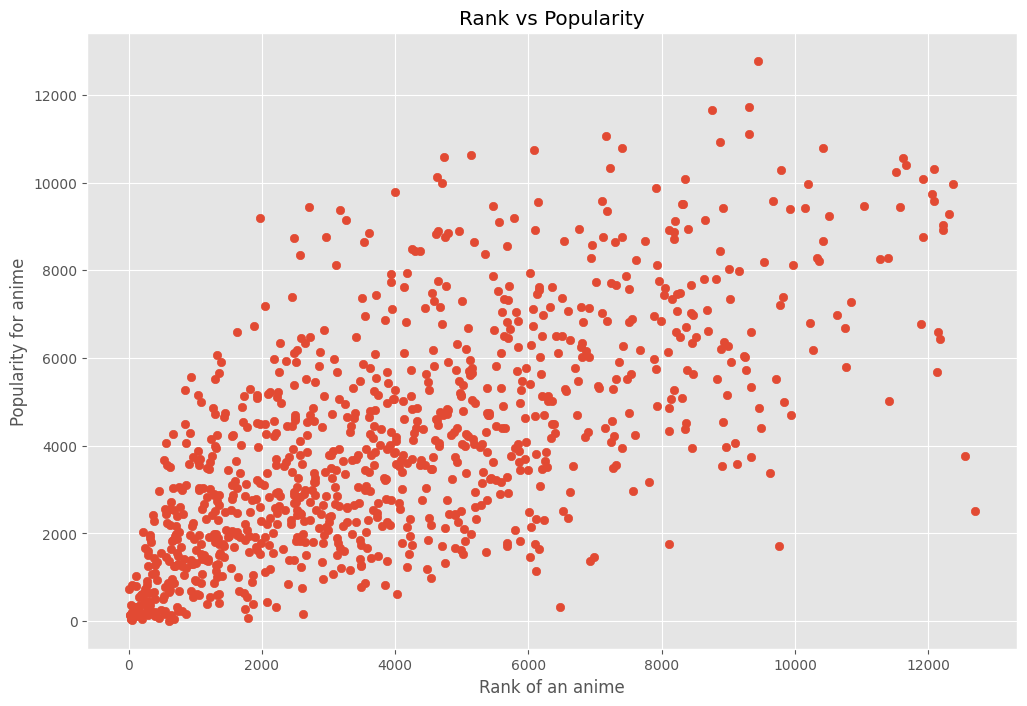

In [196]:
# Scatter plot between Rank and Popularity

plt.scatter(x=df['Rank'], y=df['Popularity'])
plt.title('Rank vs Popularity')
plt.xlabel('Rank of an anime')
plt.ylabel('Popularity for anime')
plt.show()


<Axes: xlabel='Rank', ylabel='Popularity'>

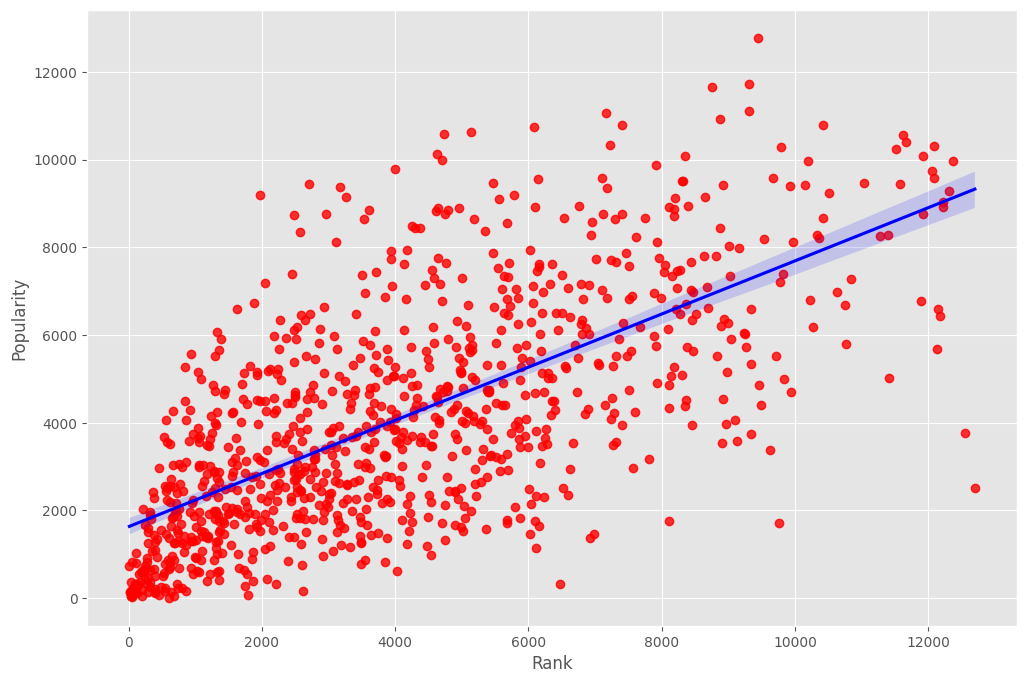

In [199]:
# Plot Rank vs Popularity using seaborn

sns.regplot(x='Rank', y='Popularity', data=df, scatter_kws={'color':'Red'}, line_kws={'color':'Blue'})

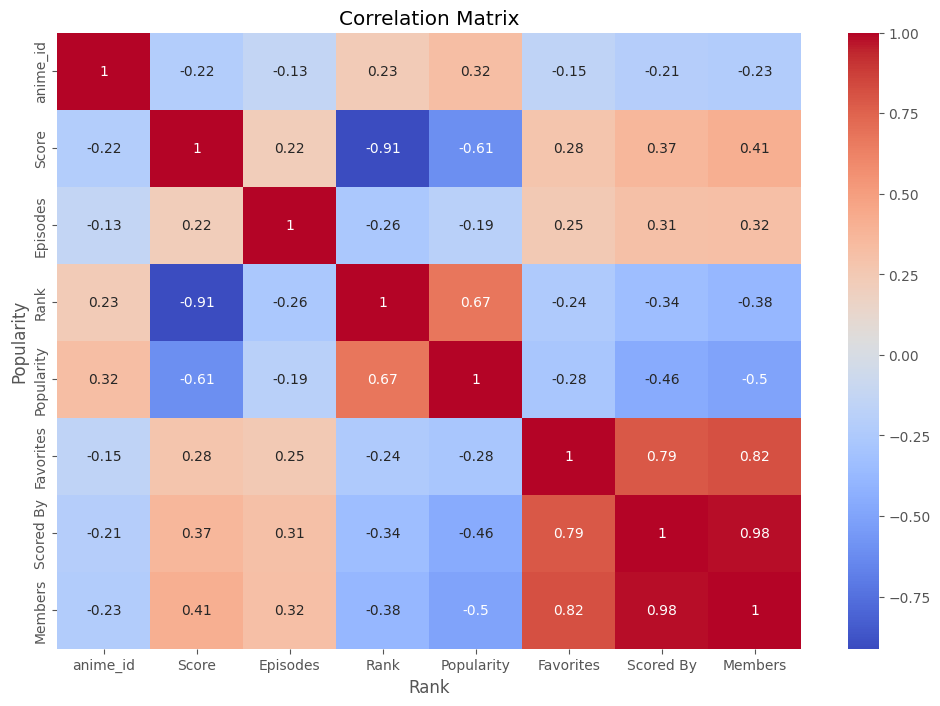

In [203]:
# Creating a heatmap

numeric_df = df.select_dtypes(include=['number'])  # Filter to keep only numeric columns
correlation_matrix = numeric_df.corr(method='pearson') # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.show()



<Axes: >

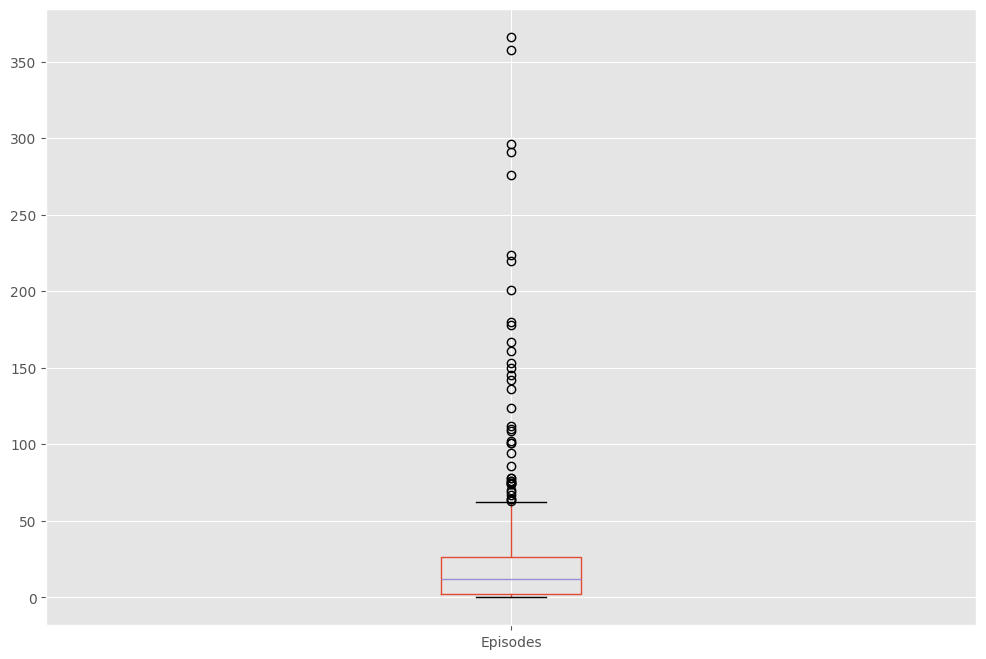

In [166]:
# Box Plot Overview
df.boxplot(column=['Episodes'])

In [207]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
387,413,312,356,815,2,318,705,2,1,519,...,160,12,61,3,12698,2512,295,47630,65622,852
716,788,203,161,258,4,246,960,2,2,554,...,63,4,92,4,12548,3774,47,15777,30553,468
650,705,129,650,626,4,152,42,0,1,220,...,62,7,49,2,12370,9979,2,1120,2501,943
899,994,786,650,92,4,320,455,2,1,602,...,81,11,74,2,12313,9278,2,1379,3206,327
914,1009,71,48,474,4,68,924,3,1,278,...,156,2,120,2,12217,8931,6,1801,3597,690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,263,309,179,174,8,330,371,4,75,800,...,71,4,77,2,40,369,20143,267388,546859,710
176,199,754,566,634,8,133,734,0,1,467,...,126,7,68,1,36,44,31139,1234780,1760676,811
9,19,582,392,549,8,293,203,4,74,175,...,71,4,79,4,26,142,47235,368569,1013100,41
833,918,274,215,879,8,84,223,4,201,129,...,135,4,79,2,16,138,57678,381428,1023068,78


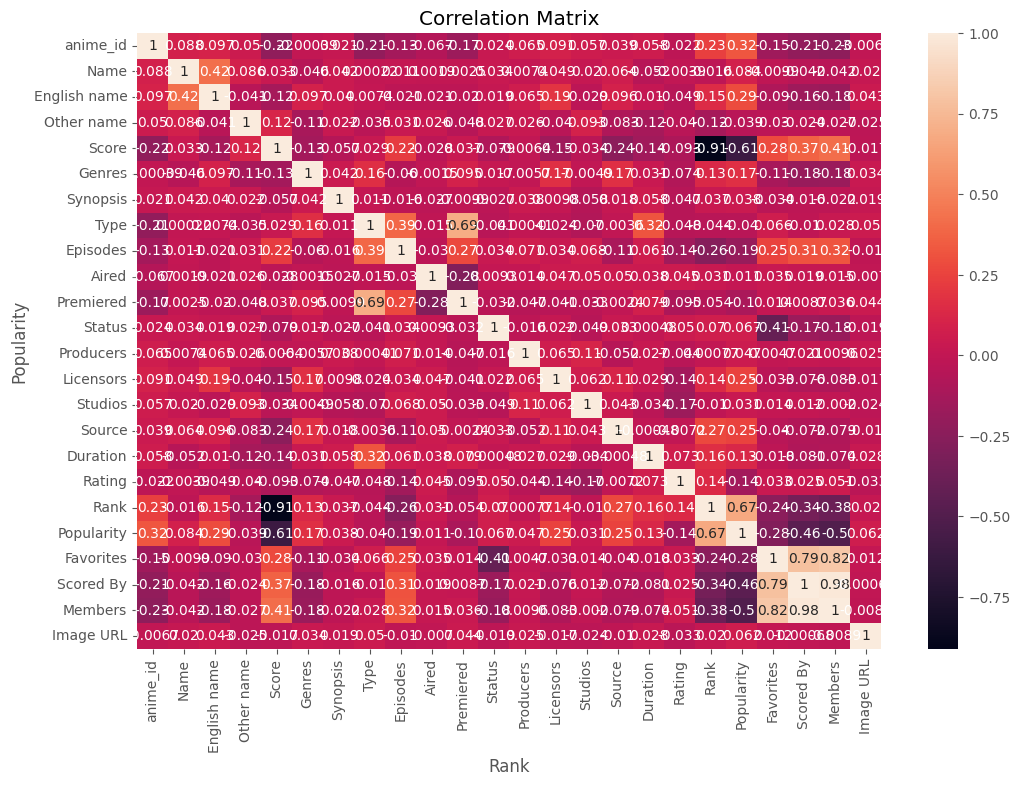

In [223]:
# Calculate and visualize the correlation matrix of numeric columns in a DataFrame using a heatmap.

numeric_df = df.select_dtypes(include=['number'])  # Filter to keep only numeric columns
correlation_matrix = numeric_df.corr(method='pearson') # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.show()

In [225]:
# Computes the correlation matrix for the DataFrame

df_numerized.corr()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
anime_id,1.000000,0.087721,0.097047,0.049792,-0.223974,-0.000385,0.021040,-0.210650,-0.132723,-0.066683,...,0.057493,0.039127,0.058126,-0.021756,0.234242,0.324632,-0.154017,-0.212381,-0.230929,-0.006663
Name,0.087721,1.000000,0.419032,0.085699,0.032976,-0.045840,0.042067,0.000224,0.011261,0.001928,...,0.020196,0.064184,-0.051640,-0.003939,-0.016088,0.083603,-0.009896,-0.042186,-0.042442,0.020232
English name,0.097047,0.419032,1.000000,-0.041340,-0.121367,0.096592,0.040071,0.007403,-0.021296,-0.021000,...,-0.028564,0.096380,0.010286,-0.049371,0.146579,0.287000,-0.089702,-0.161790,-0.175800,0.043289
Other name,0.049792,0.085699,-0.041340,1.000000,0.117494,-0.114949,0.022059,-0.034741,0.031137,0.026493,...,0.092850,-0.082605,-0.122233,-0.040197,-0.124996,-0.038846,-0.029964,-0.024302,-0.026965,-0.024697
Score,-0.223974,0.032976,-0.121367,0.117494,1.000000,-0.132605,-0.057203,0.029264,0.217605,-0.027798,...,-0.034005,-0.235334,-0.143009,-0.092615,-0.911195,-0.610941,0.282005,0.368593,0.411427,-0.017039
Genres,-0.000385,-0.045840,0.096592,-0.114949,-0.132605,1.000000,0.042197,0.158639,-0.059597,-0.001470,...,-0.004894,0.168113,0.031219,-0.074201,0.130851,0.168514,-0.113524,-0.184777,-0.176289,0.034010
Synopsis,0.021040,0.042067,0.040071,0.022059,-0.057203,0.042197,1.000000,0.010787,-0.016224,-0.027181,...,-0.057946,0.017775,0.058081,-0.046790,0.036553,0.038352,-0.034496,-0.016487,-0.021763,0.018855
Type,-0.210650,0.000224,0.007403,-0.034741,0.029264,0.158639,0.010787,1.000000,0.392637,-0.014587,...,-0.069591,-0.003551,0.316057,-0.048030,-0.043903,-0.040018,0.066212,-0.010042,0.027909,0.049795
Episodes,-0.132723,0.011261,-0.021296,0.031137,0.217605,-0.059597,-0.016224,0.392637,1.000000,-0.029631,...,0.068274,-0.108720,0.061328,-0.144847,-0.262300,-0.190786,0.247898,0.310999,0.319918,-0.010135
Aired,-0.066683,0.001928,-0.021000,0.026493,-0.027798,-0.001470,-0.027181,-0.014587,-0.029631,1.000000,...,0.050388,0.049515,0.038219,0.045156,0.030525,0.010528,0.035417,0.018689,0.015077,-0.006995


In [227]:
#  Compute and reshape the correlation matrix for analysis.

correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

anime_id   anime_id        1.000000
           Name            0.087721
           English name    0.097047
           Other name      0.049792
           Score          -0.223974
                             ...   
Image URL  Popularity      0.062320
           Favorites       0.011957
           Scored By      -0.000680
           Members        -0.008914
           Image URL       1.000000
Length: 576, dtype: float64

In [229]:
# Organizing the correlation coefficients in ascending order.

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Score         Rank           -0.911195
Rank          Score          -0.911195
Popularity    Score          -0.610941
Score         Popularity     -0.610941
Popularity    Members        -0.504644
                                ...   
English name  English name    1.000000
Scored By     Scored By       1.000000
Other name    Other name      1.000000
Members       Members         1.000000
Name          Name            1.000000
Length: 576, dtype: float64

In [237]:
# Identifing pairs of variables in a correlation matrix that have a strong positive correlation.

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Rank          Popularity      0.673270
Popularity    Rank            0.673270
Premiered     Type            0.691193
Type          Premiered       0.691193
Favorites     Scored By       0.788387
Scored By     Favorites       0.788387
Members       Favorites       0.819430
Favorites     Members         0.819430
Members       Scored By       0.984292
Scored By     Members         0.984292
Duration      Duration        1.000000
Aired         Aired           1.000000
Licensors     Licensors       1.000000
Image URL     Image URL       1.000000
anime_id      anime_id        1.000000
Studios       Studios         1.000000
Premiered     Premiered       1.000000
Producers     Producers       1.000000
Source        Source          1.000000
Status        Status          1.000000
Episodes      Episodes        1.000000
Rating        Rating          1.000000
Genres        Genres          1.000000
Score         Score           1.000000
Type          Type            1.000000
Rank          Rank       